In [5]:
import tensorflow as tf

In [24]:
tf.compat.v1.disable_eager_execution()

Allows depreciated code to run version 1

In [8]:
with tf.compat.v1.Session() as sess:
    hello = tf.constant("Hello Tensorflow!")
    print(sess.run(hello))

b'Hello Tensorflow!'


Computational graph and sessions

In [9]:
x = 2
y = 3
z = tf.add(x, y, name='Add')
print(z)

Tensor("Add:0", shape=(), dtype=int32)


Direct dependencies

In [10]:
a = tf.multiply(8,5)
print(a)
b = tf.multiply(a,1)
print(b)


Tensor("Mul:0", shape=(), dtype=int32)
Tensor("Mul_1:0", shape=(), dtype=int32)


Indirect dependencies

In [11]:
a=tf.multiply(8,5)
print(a)
b=tf.multiply(4,3)
print(b)

Tensor("Mul_2:0", shape=(), dtype=int32)
Tensor("Mul_3:0", shape=(), dtype=int32)


TensorFlow graph

In [12]:
graph = tf.Graph()

with graph.as_default():
  z = tf.add(x, y, name='Add')

If we want to clear the default graph (that is, if we want to clear the previously defined variables and operations), then we can do that using tf.reset_default_graph().

Sessions

In [13]:
a = tf.multiply(3,3)
print(a)


Tensor("Mul_4:0", shape=(), dtype=int32)


In [14]:
with tf.compat.v1.Session() as sess:
    a = tf.multiply(3,3)
    print(sess.run(a))


9


**Variables, constants, and placeholders**

**Variables**

In [15]:
x = tf.Variable(13)


In [16]:
W = tf.Variable(tf.random.normal([500, 111], stddev=0.35), name="weights")

In [17]:
print(W)

<tf.Variable 'weights:0' shape=(500, 111) dtype=float32>


Above code creates variable, W, by randomly drawing values from a normal distribution with a standard devition of 0.35

In [18]:
W2 = tf.Variable(W.read_value(), name="weights_2")

In [19]:
print(W2)

<tf.Variable 'weights_2:0' shape=(500, 111) dtype=float32>


We can see that W=W2

In [37]:
x = tf.Variable(1212)
init = tf.compat.v1.global_variables_initializer()
with tf.compat.v1.Session() as sess:
    sess.run(init)
    print(sess.run(x))


1212


In [38]:
W3 = tf.compat.v1.get_variable(name = 'weights', shape = [500, 111], initializer = tf.random_normal_initializer())
print(W3)

<tf.Variable 'weights:0' shape=(500, 111) dtype=float32>


Variables created using tf.Variable() cannot be shared, and every time we call
tf.Variable(), it will create a new variable. But tf.get_variable() checks the
computational graph for an existing variable with the specified parameter. If
the variable already exists, then it will be reused; otherwise, a new variable
will be created:

In [39]:
with tf.compat.v1.variable_scope("scope"):
    a = tf.compat.v1.get_variable('x', [2])
with tf.compat.v1.variable_scope("scope", reuse = True):
    b = tf.compat.v1.get_variable('x', [2])

Since reuse is set to true.<br>
Printing a.name and b.name must return same name

In [40]:
print(a.name)
print(b.name)

scope/x:0
scope/x:0


**Constant**

In [41]:
x = tf.constant(13)
x

<tf.Tensor 'Const:0' shape=() dtype=int32>

Placeholders and feed dictionaries

In [42]:
x = tf.compat.v1.placeholder("float", shape=None)
print(x)

Tensor("Placeholder:0", dtype=float32)


If we run the code below, then it will return an error because we are trying to compute y, where y= x+3 and x is a placeholder whose value is not assigned. As we have learned, values for the placeholders will be assigned at runtime.

In [43]:
x = tf.compat.v1.placeholder("float", shape=None)
y = x +3
with tf.compat.v1.Session() as sess:
    result = sess.run(y)
    print(result)

InvalidArgumentError: Graph execution error:

Detected at node 'Placeholder_1' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start
    File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever
    File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once
    File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run
    File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
    File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one
    File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
    File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request
    File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute
    File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell
    File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
    File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
    File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
    File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
    File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    File "<ipython-input-43-61aaa154a3ca>", line 1, in <cell line: 0>
Node: 'Placeholder_1'
You must feed a value for placeholder tensor 'Placeholder_1' with dtype float
	 [[{{node Placeholder_1}}]]

Original stack trace for 'Placeholder_1':
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start
  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever
  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once
  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
  File "<ipython-input-43-61aaa154a3ca>", line 1, in <cell line: 0>
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/ops/array_ops.py", line 3027, in placeholder
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/ops/gen_array_ops.py", line 7115, in placeholder
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/op_def_library.py", line 796, in _apply_op_helper
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/ops.py", line 2701, in _create_op_internal
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/ops.py", line 1196, in from_node_def


To solve this we can use feed dictionary

In [44]:
with tf.compat.v1.Session() as sess:
  result = sess.run(y, feed_dict={x: 5})
  print(result)

8.0


We can also use multiple value of x

In [45]:
with tf.compat.v1.Session() as sess:
  result = sess.run(y, feed_dict={x: [3,6,9]})
  print(result)

[ 6.  9. 12.]


Let's say we define the shape of x as [None,2]

This means that x can take a matrix of any rows but with 2 columns, as shown in the following code:

In [46]:
with tf.compat.v1.Session() as sess:
  x_val = [[1, 2,],
          [3,4],
          [5,6],
          [7,8],]
  result = sess.run(y, feed_dict={x: x_val})
  print(result)


[[ 4.  5.]
 [ 6.  7.]
 [ 8.  9.]
 [10. 11.]]


#### **TensorBoard**

Building a basic computational graph and visualize it in TensorBoard

In [47]:
x = tf.constant(1,name='x')
y = tf.constant(1,name='y')
a = tf.constant(3,name='a')
b = tf.constant(3,name='b')

In [49]:
prod1 = tf.multiply(x,y,name='prod1')
prod2 = tf.multiply(a,b,name='prod2')

In [50]:
sum = tf.add(prod1,prod2,name='sum')

In [52]:
with tf.compat.v1.Session() as sess:
  writer = tf.compat.v1.summary.FileWriter(logdir='./graphs',graph=sess.graph)
  print(sess.run(sum))

10


In [53]:
%load_ext tensorboard

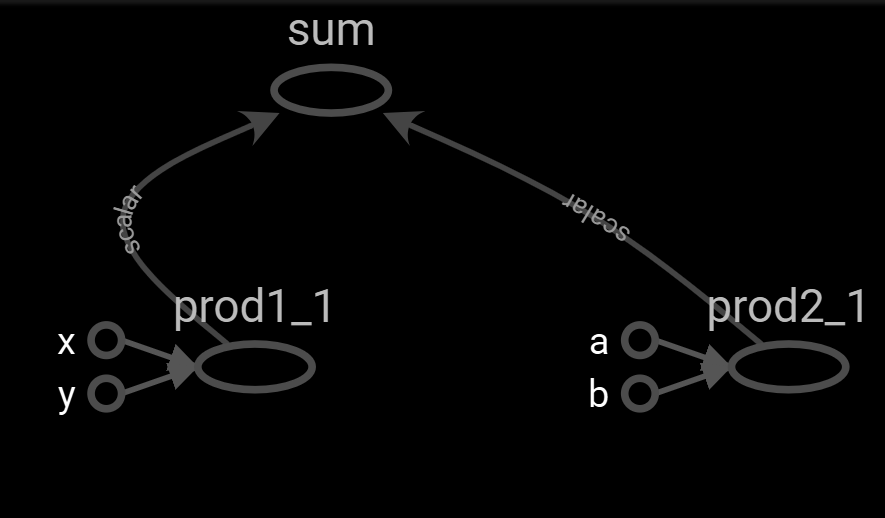

Creating a namespace

In [55]:
with tf.name_scope("Product"):
    with tf.name_scope("prod1"):
        prod1 = tf.multiply(x,y,name='prod1')
    with tf.name_scope("prod2"):
        prod2 = tf.multiply(a,b,name='prod2')

In [56]:
with tf.name_scope("sum"):
    sum = tf.add(prod1,prod2,name='sum')

In [57]:
with tf.compat.v1.Session() as sess:
    writer = tf.compat.v1.summary.FileWriter('./graphs', sess.graph)
    print(sess.run(sum))

10


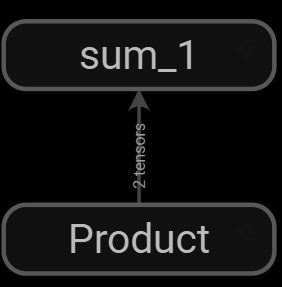

#### Handwritten digit classification using TensorFlow

Importing the required libraries


In [62]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

Loading the dataset

In [64]:
mnist = tf.keras.datasets.mnist

In [65]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [66]:
print("No of images in training set {}".format(x_train.shape))
print("No of labels in training set {}".format(y_train.shape))
print("No of images in test set {}".format(x_test.shape))
print("No of labels in test set {}".format(y_test.shape))

No of images in training set (60000, 28, 28)
No of labels in training set (60000,)
No of images in test set (10000, 28, 28)
No of labels in test set (10000,)


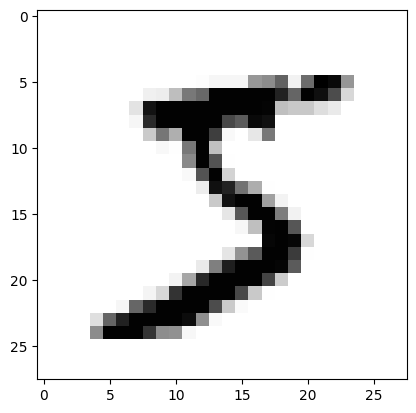

In [67]:
img1 = x_train[0].reshape(28,28)
plt.imshow(img1, cmap='Greys')

Defining the number of neurons in each layer


In [68]:
#number of neurons in input layer
num_input = 784
#num of neurons in hidden layer 1
num_hidden1 = 512
#num of neurons in hidden layer 2
num_hidden2 = 256
#num of neurons in hidden layer 3
num_hidden_3 = 128
#num of neurons in output layer
num_output = 10

Defining placeholders

In [69]:
with tf.name_scope('input'):
  X = tf.compat.v1.placeholder("float", [None, num_input])
with tf.name_scope('output'):
  Y = tf.compat.v1.placeholder("float", [None, num_output])

define all of the weights in a dictionary

In [70]:
with tf.name_scope('weights'):
    weights = {
    'w1': tf.Variable(tf.compat.v1.truncated_normal([num_input, num_hidden1], stddev=0.1),name='weight_1'),
    'w2': tf.Variable(tf.compat.v1.truncated_normal([num_hidden1, num_hidden2], stddev=0.1),name='weight_2'),
    'w3': tf.Variable(tf.compat.v1.truncated_normal([num_hidden2, num_hidden_3], stddev=0.1),name='weight_3'),
    'out': tf.Variable(tf.compat.v1.truncated_normal([num_hidden_3, num_output], stddev=0.1),name='weight_4'),
    }

Defining biases

In [71]:
with tf.name_scope('biases'):
    biases = {
    'b1': tf.Variable(tf.constant(0.1, shape=[num_hidden1]),name='bias_1'),
    'b2': tf.Variable(tf.constant(0.1, shape=[num_hidden2]),name='bias_2'),
    'b3': tf.Variable(tf.constant(0.1, shape=[num_hidden_3]),name='bias_3'),
    'out': tf.Variable(tf.constant(0.1, shape=[num_output]),name='bias_4')
    }

Forward propagation

In [72]:
with tf.name_scope('Model'):
    with tf.name_scope('layer1'):
        layer_1 = tf.nn.relu(tf.add(tf.matmul(X, weights['w1']), biases['b1']) )
    with tf.name_scope('layer2'):
        layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['w2']), biases['b2']))
    with tf.name_scope('layer3'):
        layer_3 = tf.nn.relu(tf.add(tf.matmul(layer_2, weights['w3']), biases['b3']))
    with tf.name_scope('output_layer'):
        y_hat = tf.nn.sigmoid(tf.matmul(layer_3, weights['out']) + biases['out'])

Computing loss and backpropagation

In [73]:
with tf.name_scope('Loss'):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_hat,labels=Y))

In [74]:
learning_rate = 1e-4
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate).minimize(loss)

Computing accuracy

In [75]:
with tf.name_scope('Accuracy'):
    predicted_digit = tf.argmax(y_hat, 1)
    actual_digit = tf.argmax(Y, 1)
    correct_pred = tf.equal(predicted_digit,actual_digit)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

Creating summary

In [88]:
tf.compat.v1.summary.scalar("Accuracy", accuracy)
tf.compat.v1.summary.scalar("Loss", loss)
merge_summary = tf.compat.v1.summary.merge_all()

Training the model

we need to initialize all of the variables

In [89]:
init = tf.compat.v1.global_variables_initializer()

In [90]:
learning_rate = 1e-4
num_iterations = 1000
batch_size = 128

Implemented function that return next batch for training

In [91]:
import numpy as np

def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels.
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

convert an array of labels to categorical values

In [92]:
def to_categorical(data):
    categorical_data = []
    for each in data:
        categorical = []
        for i in range(0, 10):
            if each == i:
                categorical.append(1)
            else:
                categorical.append(0)
        categorical_data.append(categorical)
    return categorical_data

In [93]:
with tf.compat.v1.Session() as sess:
    sess.run(init)
    summary_writer = tf.compat.v1.summary.FileWriter('./graphs', graph=sess.graph)
    for i in range(num_iterations):
        batch_x, batch_y = next_batch(batch_size, x_train, y_train)
        batch_x = np.resize(batch_x, (batch_size, 784))
        batch_y = to_categorical(batch_y)
        sess.run(optimizer, feed_dict={ X: batch_x, Y: batch_y})
        if i % 100 == 0:
            batch_loss, batch_accuracy,summary = sess.run([loss, accuracy, merge_summary], feed_dict={X: batch_x, Y: batch_y})
            #store all the summaries
            summary_writer.add_summary(summary, i)
            print('Iteration: {}, Loss: {}, Accuracy:{}'.format(i,batch_loss,batch_accuracy))

Iteration: 0, Loss: 2.2840895652770996, Accuracy:0.1484375
Iteration: 100, Loss: 2.0018420219421387, Accuracy:0.2890625
Iteration: 200, Loss: 1.8800489902496338, Accuracy:0.4921875
Iteration: 300, Loss: 1.7660125494003296, Accuracy:0.6015625
Iteration: 400, Loss: 1.7834100723266602, Accuracy:0.6171875
Iteration: 500, Loss: 1.6922390460968018, Accuracy:0.671875
Iteration: 600, Loss: 1.7137670516967773, Accuracy:0.7109375
Iteration: 700, Loss: 1.6622416973114014, Accuracy:0.7109375
Iteration: 800, Loss: 1.7141258716583252, Accuracy:0.703125
Iteration: 900, Loss: 1.6688659191131592, Accuracy:0.8046875


Visualizing graphs in tensorboard

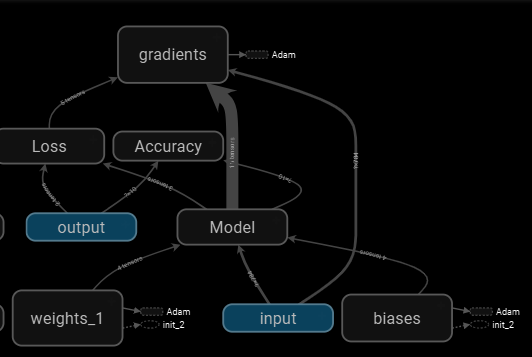

Inside model

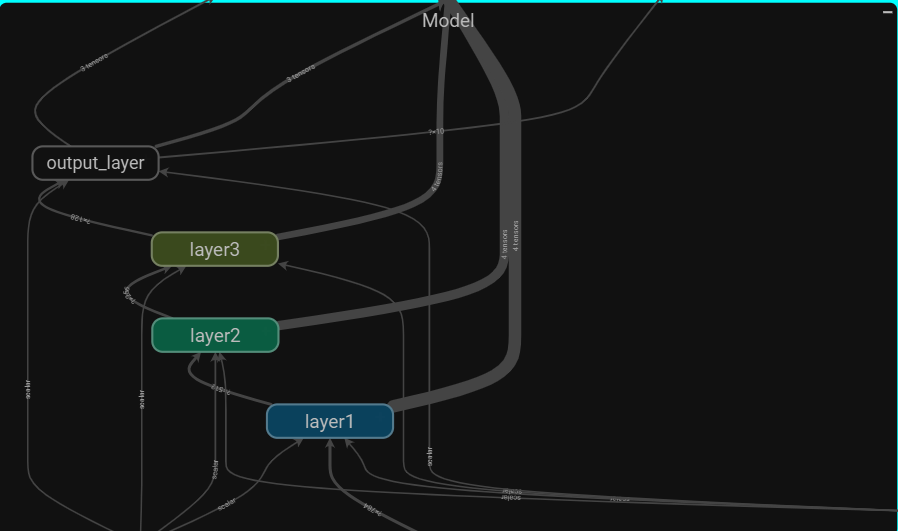

Inside weights

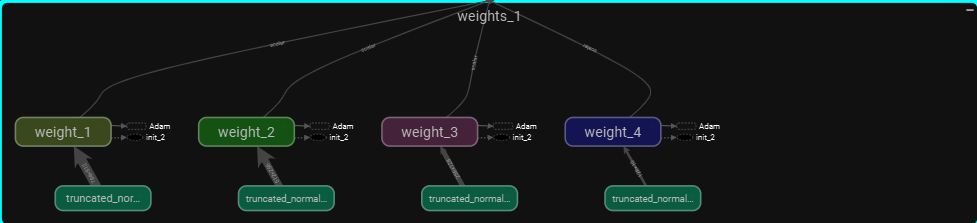

Accuracy node

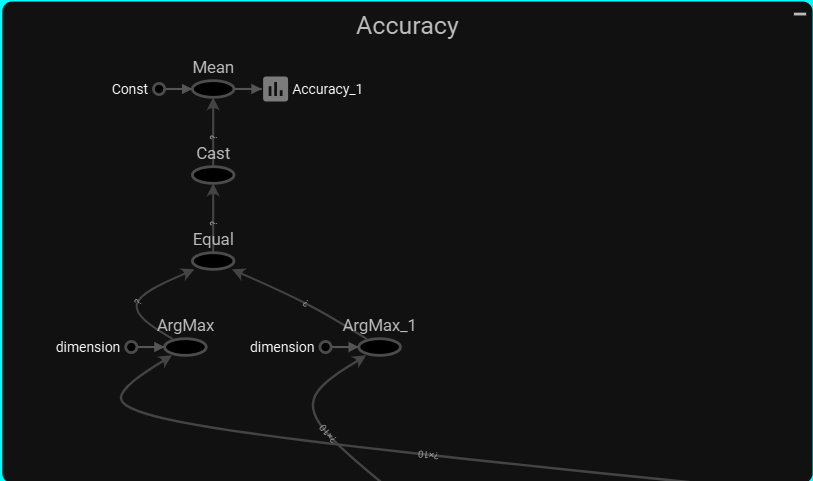

Loss graph

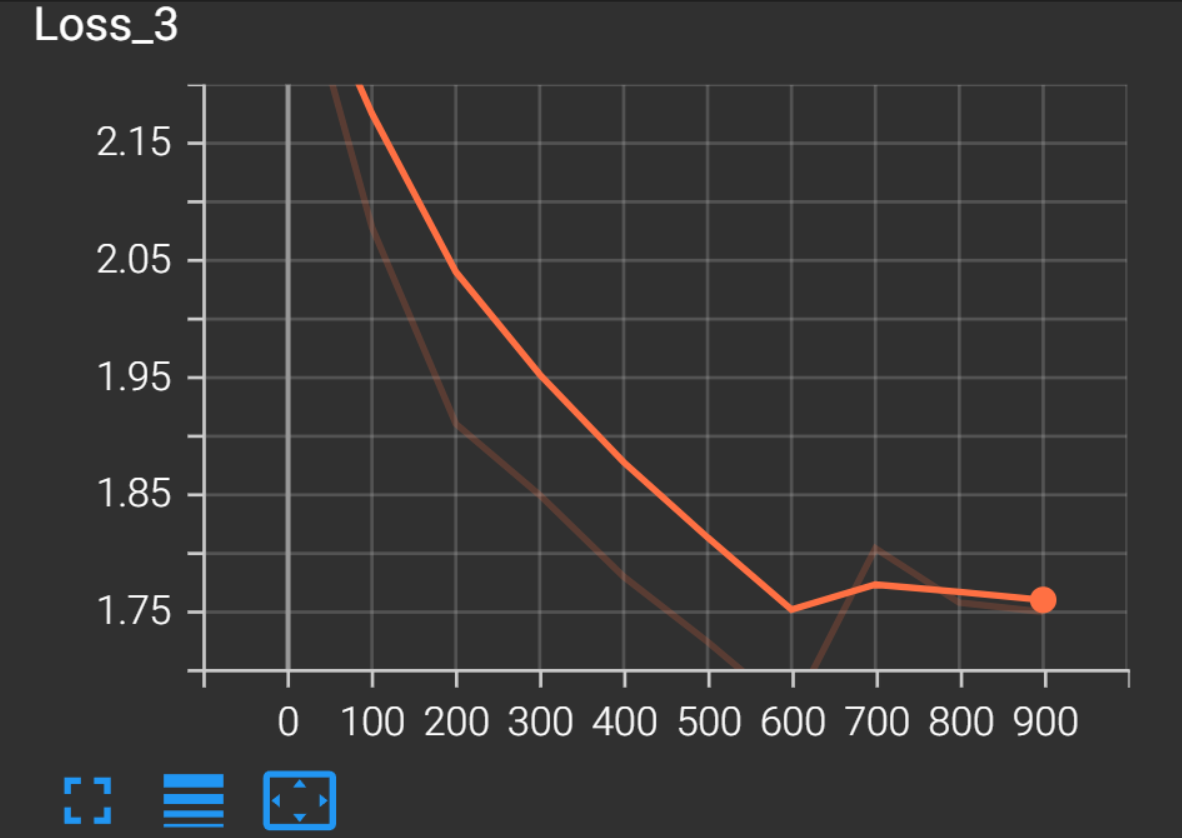

Accuracy graph

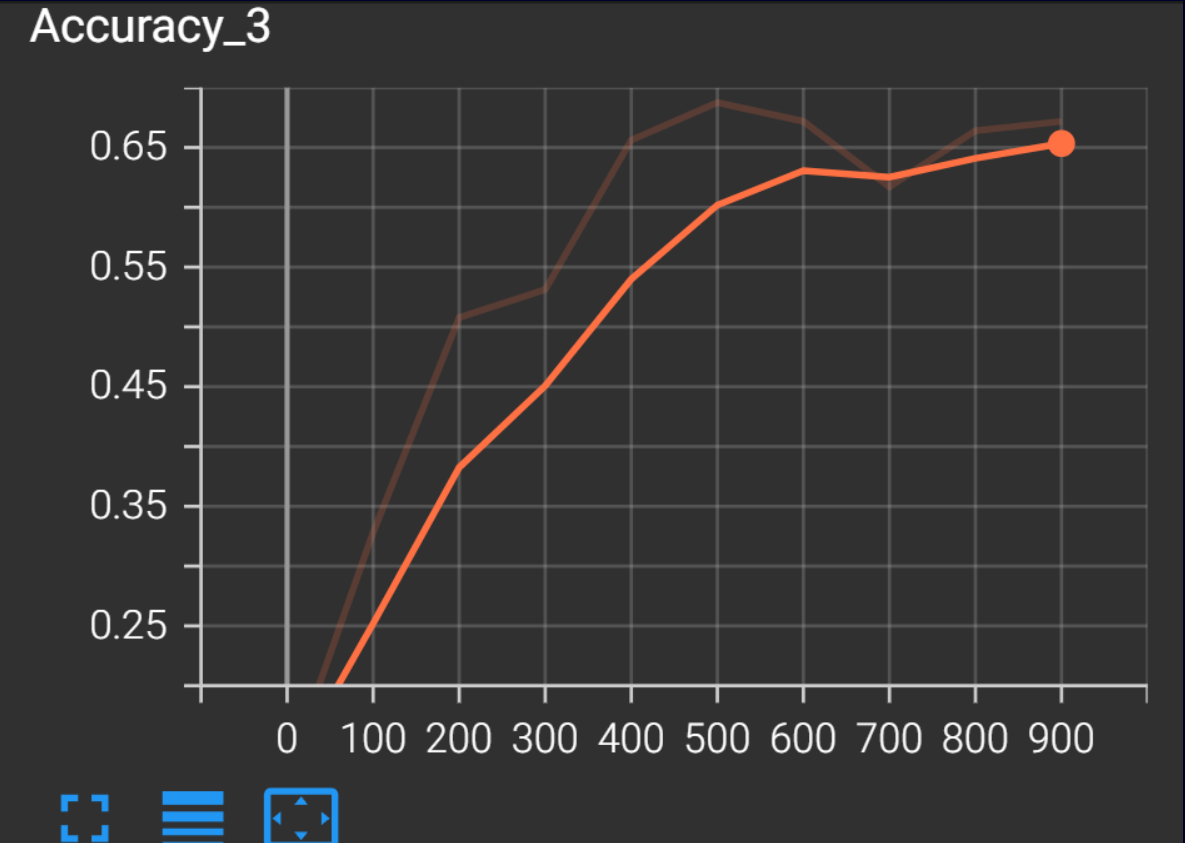